In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from matplotlib import colors as mcolors
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('data/recipe_ingredient_frequency.csv', index_col = 'RECIPE_TITLE')
data = data.drop(columns=['RECIPE_ID'])
data.head()

,돼지고기,소고기,닭고기,오리고기,양고기,생선,갑각류,조개류,해조류,두족류,...,면류,소스장류,유지류,조미료,육수,가루,즉석식품,건조식품,빵류,주류
RECIPE_TITLE,,,,,,,,,,,,,,,,,,,,,
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69레시피 불고기 소고기볶음반찬,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
최애반찬 소시지 감자조림,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def elbowMethod(start, end, step, data):
    sse = []
    clusters=list(range(start, end, step))

    for k in clusters:
        kmeans = KMeans(init="k-means++", n_clusters=k, random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(6, 6))
    plt.plot(clusters, sse, '-o')
    plt.xlabel(r'Number of clusters *k*')
    plt.ylabel('Sum of squared distance')

In [1]:
def silhouetteAnalysis(start, end, step, data):
    for i, k in enumerate(list(range(start, end, step))):
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # Run the Kmeans algorithm
        km = KMeans(init="k-means++", n_clusters=k, random_state=0)
        labels = km.fit_predict(data)
        centroids = km.cluster_centers_

        # Get silhouette samples
        silhouette_vals = silhouette_samples(data, labels)

        # Silhouette plot
        y_ticks = []
        y_lower, y_upper = 0, 0
        for i, cluster in enumerate(np.unique(labels)):
            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()
            y_upper += len(cluster_silhouette_vals)
            ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
            ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
            y_lower += len(cluster_silhouette_vals)

        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title('Silhouette plot for the various clusters', y=1.02);
        plt.tight_layout()
        plt.suptitle(f'Silhouette analysis using k = {k}',
                     fontsize=16, fontweight='semibold', y=1.05);

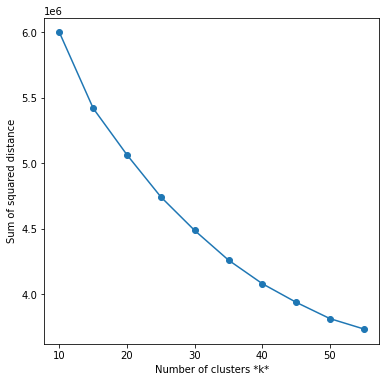

In [9]:
elbowMethod(10, 60, 5, data)

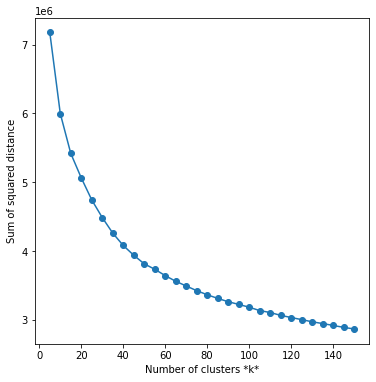

In [41]:
elbowMethod(5, 151, 5, data)

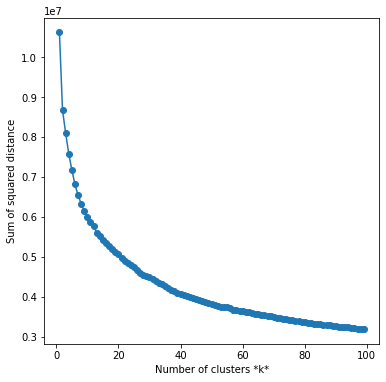

In [13]:
elbowMethod(1, 100, 1, data)

In [2]:
silhouetteAnalysis(10, 15, 5, data)

NameError: name 'data' is not defined